# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset
## Note:-
This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells <u><b> If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary.</b></u>  So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

In [14]:
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")

In [15]:
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:, 4].values

# Splitting The Dataset Into Training And Testing Set

In [23]:
len(X_train),len(X_test),len(Y_test),len(Y_train)

(300, 100, 100, 300)

# Feature Scaling
* <b>Feature scaling is essential for machine learning algorithms that calculate distances between data.</b>
* Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
* #### Formula :- 
##### X(new) =  Xi - MIN(X) / MAX(X) - MIN(X)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting Logistic Regression to Train the set

In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

# Predicting the test set results

In [19]:
Y_pred = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.4025735294117646

# Visualising the Training set results

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

In [27]:
print(X1,X2)

[[-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 [-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 [-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 ...
 [-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 [-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]
 [-2.99318916 -2.98318916 -2.97318916 ...  3.13681084  3.14681084
   3.15681084]] [[-2.58254245 -2.58254245 -2.58254245 ... -2.58254245 -2.58254245
  -2.58254245]
 [-2.57254245 -2.57254245 -2.57254245 ... -2.57254245 -2.57254245
  -2.57254245]
 [-2.56254245 -2.56254245 -2.56254245 ... -2.56254245 -2.56254245
  -2.56254245]
 ...
 [ 3.30745755  3.30745755  3.30745755 ...  3.30745755  3.30745755
   3.30745755]
 [ 3.31745755  3.31745755  3.31745755 ...  3.31745755  3.31745755
   3.31745755]
 [ 3.32745755  3.32745755  3.32745755 ...  3.32745755  3.32745755
   3.32745755]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


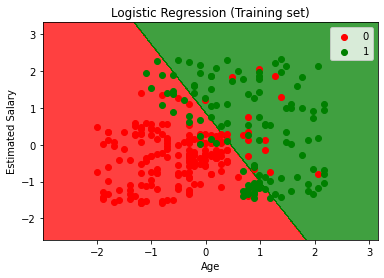

In [36]:
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
   plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Visualising the Test set results

In [37]:
from matplotlib.colors import ListedColormap

In [39]:
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


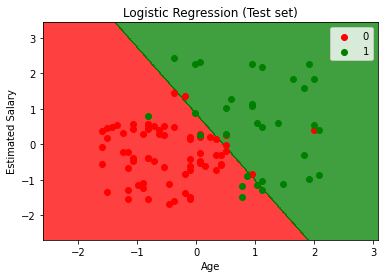

In [43]:
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
   plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()